`Mutiple Linear Regression (MLR) in`  $\N$  `dimension`

In [158]:
# Import the libraries and set a arandom seed
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from mpl_toolkits import mplot3d

torch.manual_seed(1)

In [87]:
# Set weight and bias
w = torch.tensor([[1.0],[2.0]],requires_grad=True)
b = torch.tensor([[3.0]],requires_grad=True)

In [88]:
# Define prediction fnction
def forward(x):
    yhat = torch.mm(x,w)+b
    # torch.mm uses as a matrix multiplication
    return yhat

In [89]:
# example_1
x = torch.tensor([[2.0,3.0]])
yhat = forward(x)
print(f'the prediction result is:{yhat}')

the prediction result is:tensor([[11.]], grad_fn=<AddBackward0>)


In [90]:
# example_2
x = torch.tensor([[1.0,2.0],[2.0,3.0],[5.0,6.0]])
yhat =forward(x)
print(f'theresult for this example is:{yhat}')

theresult for this example is:tensor([[ 8.],
        [11.],
        [20.]], grad_fn=<AddBackward0>)


In [91]:
# Class Linear

model = nn.Linear(in_features=2, out_features=1)

In [92]:
model.state_dict()

OrderedDict([('weight', tensor([[ 0.3643, -0.3121]])),
             ('bias', tensor([-0.1371]))])

In [93]:
# example_1 for Linear class (for a sample)
x = torch.tensor([[2.0,3.0]])
yhat = model(x)
print(f'result:{yhat}')

result:tensor([[-0.3447]], grad_fn=<AddmmBackward0>)


In [94]:
# example_2 for Linear class (for multiple samples)
x = torch.tensor([[2.0,6.0],[5.0,4.0]])
yhat = model(x)
print(f'the result is {yhat}')

the result is tensor([[-1.2810],
        [ 0.4362]], grad_fn=<AddmmBackward0>)


In [95]:
# The class of Linear Regression

class LR(nn.Module):

    # Constructor
    def __init__ (self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction
    def forward(self,x):
        yhat = self.linear(x)
        return yhat


In [96]:
model = LR(2,1)

In [97]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3319, -0.6657]], requires_grad=True),
 Parameter containing:
 tensor([0.4241], requires_grad=True)]

In [98]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[ 0.3319, -0.6657]])),
             ('linear.bias', tensor([0.4241]))])

In [99]:
model(x)

tensor([[-2.9063],
        [-0.5793]], grad_fn=<AddmmBackward0>)

In [100]:
# The function for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

In [101]:
# Create a 2D dataset

class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b    
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [102]:
data_set = Data2D()

In [103]:
model = LR(2,1)
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[0.5303, 0.0084]], requires_grad=True), Parameter containing:
tensor([-0.3725], requires_grad=True)]


In [104]:
# Create the optimizer

optimizer = optim.SGD(model.parameters(),lr = 0.1)

In [105]:
# Create the cost function

criterion =nn.MSELoss()

In [106]:
# Create the data Loader

train_loader = DataLoader(dataset=data_set,batch_size = 2)

before_training:


/tmp/ipykernel_7057/2750535141.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


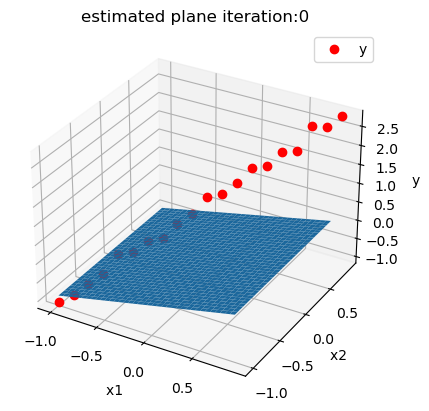

In [107]:
print(f'before_training:')
Plot_2D_Plane(model,data_set)

after_trainig:


/tmp/ipykernel_7057/2750535141.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


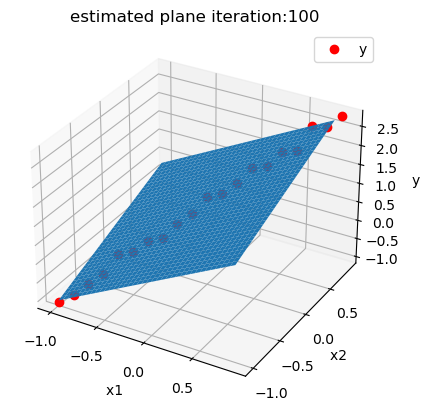

In [108]:
# train the model
LOSS = []
epochs = 100

def train_model(epochs):
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat,y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
train_model(epochs)
print('after_trainig:')
Plot_2D_Plane(model, data_set, epochs)

Text(0, 0.5, 'Cost/total loss ')

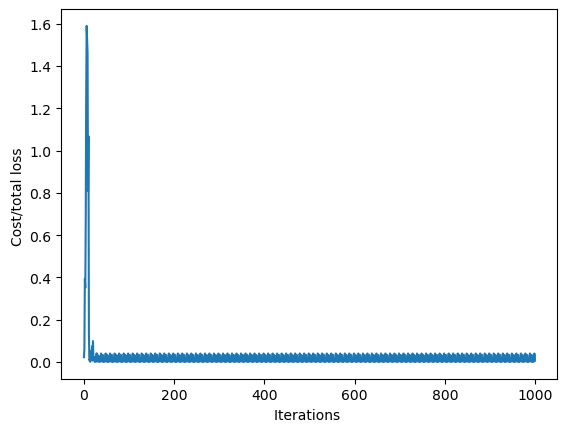

In [109]:
plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

`what will append when we have multiple  output`

In [111]:
model = LR(1,10)
list(model.parameters())

[Parameter containing:
 tensor([[-0.6643],
         [ 0.5474],
         [-0.7466],
         [ 0.9239],
         [-0.6429],
         [ 0.2828],
         [ 0.3045],
         [ 0.2379],
         [ 0.8294],
         [-0.4153]], requires_grad=True),
 Parameter containing:
 tensor([-0.4222, -0.8666, -0.0410, -0.4737,  0.0401, -0.2050,  0.3318,  0.8651,
          0.2951, -0.3221], requires_grad=True)]

In [114]:
model(torch.tensor([[1.0]]))

tensor([[-1.0864, -0.3192, -0.7876,  0.4502, -0.6028,  0.0778,  0.6363,  1.1029,
          1.1245, -0.7375]], grad_fn=<AddmmBackward0>)

In [119]:
# the example of mutiple sample and mutiple output

x = torch.tensor([[1.0,2.0],[3.0,2.0],[5.0,2.0]]) # mutiple sample
model =LR(2,10)
yhat = model(x)
yhat

tensor([[-1.8503, -0.3191,  0.8117,  0.4807,  1.0998, -1.1167, -0.9760, -1.2702,
         -0.1249,  0.0904],
        [-2.5442,  0.8709,  1.0972, -0.4205,  1.8924, -1.9204, -0.9565, -2.0593,
         -0.5321, -0.2814],
        [-3.2382,  2.0609,  1.3827, -1.3217,  2.6849, -2.7241, -0.9370, -2.8484,
         -0.9393, -0.6531]], grad_fn=<AddmmBackward0>)

In [125]:
# Make dtatset for multiple output
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):

    def __init__(self):
        self.x = torch.zeros(20,2)
        self.x[:,0] = torch.arange(-1,1,0.1)
        self.x[:,1] = torch.arange(-1,1,0.1)
        self.w = torch.tensor([[1.0,2.0],[3.0,4.0]])
        self.b = torch.tensor([[6.0,2.0]])
        self.f = torch.mm(self.x, self.w)+self.b

        self.y = self.f + 0.001*torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    def __getitem__(self,index):
        return self.x[index], self.y[index] 
    
    def __len__(self):
        return self.len

In [128]:
# the dataset
data_set = Data()

In [127]:
# we looking for model for multiple output results
model = LR(2,2)

In [131]:
# optimizer object. lr =0.1 and we have to use model.parameters  inside the code because we want to update w and b
optimizer = optim.SGD(model.parameters(), lr =0.1)

In [132]:
#criterion function
criterion = nn.MSELoss()

In [134]:
# train loader
train_loader = DataLoader(dataset=data_set,batch_size=5)

In [135]:
LOSS = []

epochs = 100

for epoch in range(epochs):
    for x,y in train_loader:
        #make_prediction
        yhat = model(x)
        #criterion
        loss = criterion(yhat,y)
        #stor loss
        LOSS.append(loss.item())
        #clear_gradient
        optimizer.zero_grad()
        # learn the model
        loss.backward()
        # update the parameters
        optimizer.step()

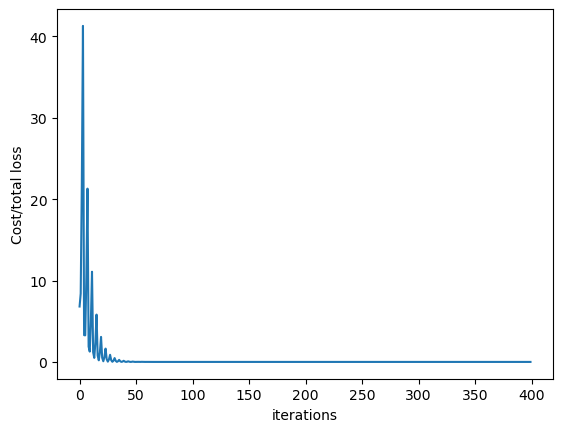

In [137]:
plt.plot(LOSS)
plt.xlabel('iterations')
plt.ylabel('Cost/total loss')
plt.show()

`Logistic Regression`

Text(0, 0.5, 'yhat')

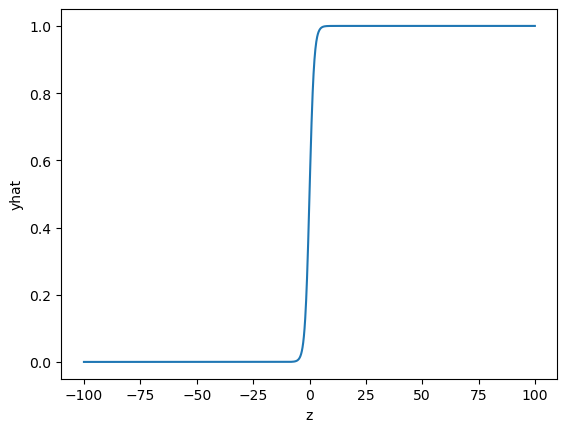

In [143]:
z = torch.arange(-100,100,0.1).view(-1,1)
sig = nn.Sigmoid()
yhat = sig(z)

plt.plot(z.numpy(),yhat.numpy())
plt.xlabel('z')
plt.ylabel('yhat')

In [151]:
# build a logestic regression with nn.Sequential

x = torch.tensor([[1.0]])
X = torch.tensor([[1.0],[2.0]])
model = nn.Sequential(nn.Linear(1,1), nn.Sigmoid())

yhat = model(x)
Yhat =model(X)
yhat, Yhat, model.state_dict()

(tensor([[0.5031]], grad_fn=<SigmoidBackward0>),
 tensor([[0.5031],
         [0.4559]], grad_fn=<SigmoidBackward0>),
 OrderedDict([('0.weight', tensor([[-0.1894]])),
              ('0.bias', tensor([0.2019]))]))

In [152]:
# The module of the Logistic Regression

class logistic_regression(nn.Module):

    def __init__(self,n_inputs):
        super(logistic_regression,self).__init__()
        self.linear = nn.Linear(n_inputs,1)

    def forward(self,x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [154]:
# example for single dimenson

x = torch.tensor([[1.0]])
X = torch.tensor([[1.0],[2.0],[3.0]])

model = logistic_regression(1)

yhat = model(x)
Yhat = model(X)

yhat, Yhat

(tensor([[0.7547]], grad_fn=<SigmoidBackward0>),
 tensor([[0.7547],
         [0.8438],
         [0.9046]], grad_fn=<SigmoidBackward0>))

In [156]:
# example for two dimension

x = torch.tensor([[1.0,2.0]])
X = torch.tensor([[1.0,2.0],[3.0,4.0],[6.0,9.0]])

model = logistic_regression(2)

yhat = model(x)
Yhat = model(X)
yhat, Yhat

(tensor([[0.2328]], grad_fn=<SigmoidBackward0>),
 tensor([[0.2328],
         [0.1212],
         [0.0185]], grad_fn=<SigmoidBackward0>))

`Cross entropy as loss function`

In [159]:
# Create class for plotting and the function for plotting

class plot_error_surfaces(object):
    
    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                yhat= 1 / (1 + np.exp(-1*(w2*self.x+b2)))
                Z[count1,count2]=-1*np.mean(self.y*np.log(yhat+1e-16) +(1-self.y)*np.log(1-yhat+1e-16))
                count2 += 1   
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        
# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

In [160]:
# set random seed
torch.manual_seed(0)

In [161]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
    
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

In [162]:
data_set=Data()

In [163]:
# Create logistic_regression class

class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [164]:
# Create the logistic_regression result

model = logistic_regression(1)

In [165]:
# Set the weight and bias

model.state_dict() ['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict() ['linear.bias'].data[0] = torch.tensor([[-10]])
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[-5.]])), ('linear.bias', tensor([-10.]))])


<Figure size 640x480 with 0 Axes>

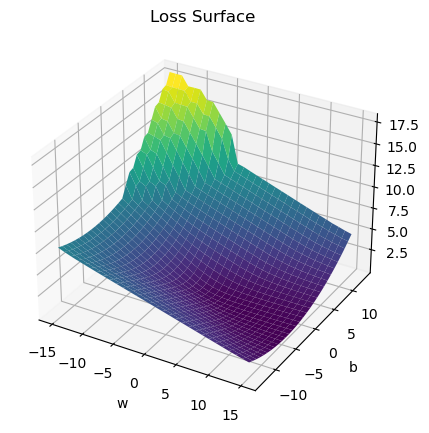

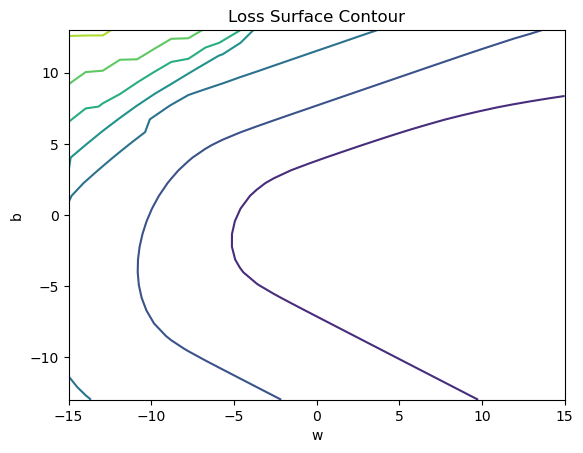

In [166]:
# Create the plot_error_surfaces object

get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)

In [167]:
# Create dataloader, criterion function and optimizer

def criterion(yhat,y):
    out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
    return out
trainloader = DataLoader(dataset = data_set, batch_size = 3)
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

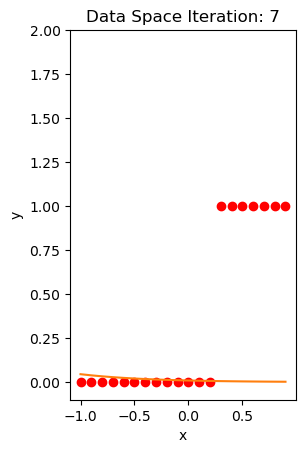

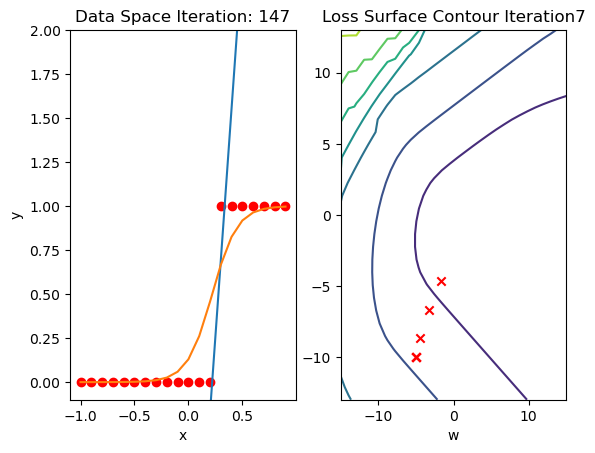

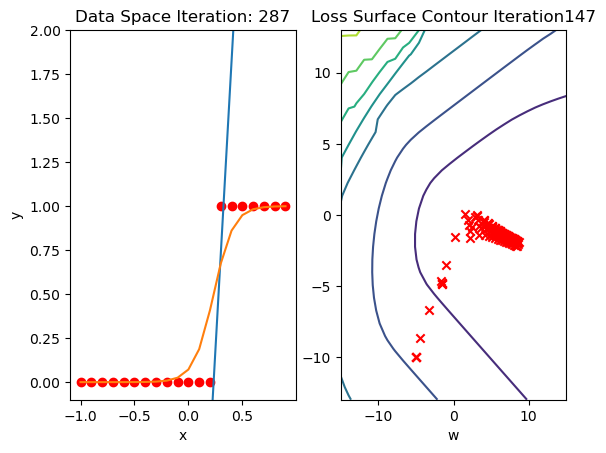

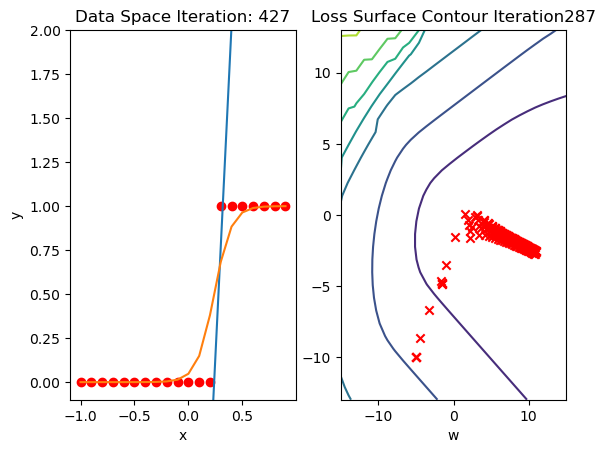

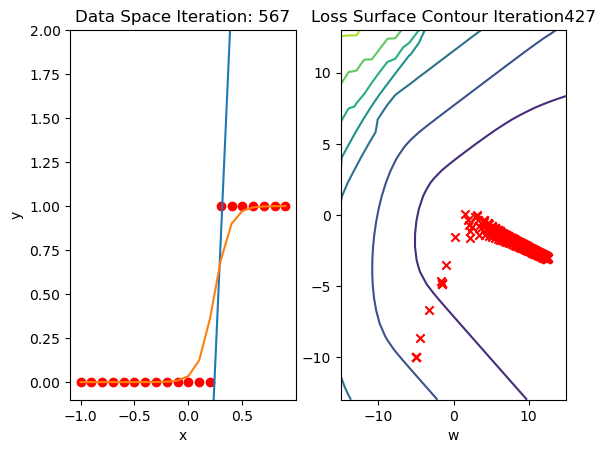

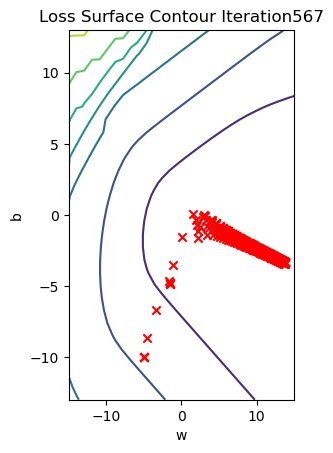

In [168]:
# Train the Model

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            get_surface.plot_ps()
            
train_model(100)